# Final Project: Diabetes prediction using Random Forest

## 1. Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # to read the csv file
import matplotlib.pyplot as plt # to plot the tree graph
import seaborn as sns # to plot

from sklearn.model_selection import train_test_split
#      lib.module         classs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


#importing metrics classes
#    liberary.module        #class
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix

## 2. Reading & storing the csv file

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Pregnancies: Number of times pregnant
### Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
### BloodPressure: Diastolic blood pressure (mm Hg)
### SkinThickness: Triceps skin fold thickness (mm)
### Insulin: 2-Hour serum insulin (mu U/ml)
### BMI: Body mass index (weight in kg/(height in m)^2)
### DiabetesPedigreeFunction: Diabetes pedigree function
### Age: Age (years)
### Outcome: Class variable (0 or 1) where 1 has been tested positive for diabetes

## 3. Checking if the data needs to be cleaned or if it contains null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

In [16]:
# We can fill in NaN values with a median according to the target
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df[df["Outcome"]==1][col].median()

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 4. Making the model

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
X = df [['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (614, 8)
X_test shape is  (154, 8)
y_train shape is  (614,)
y_test shape is  (154,)


In [21]:
for k in range(10,300,30):
    RandomForestClassifierModel = RandomForestClassifier(n_estimators=k,max_depth=5,random_state=33) 
    RandomForestClassifierModel.fit(X_train, y_train)
    print(f"at {k} trees:")
    print('Random Forest Regressor Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
    print('Random Forest Regressor Test Score  is : ' , RandomForestClassifierModel.score(X_test, y_test))
    print("\n")

at 10 trees:
Random Forest Regressor Train Score is :  0.9201954397394136
Random Forest Regressor Test Score  is :  0.8701298701298701


at 40 trees:
Random Forest Regressor Train Score is :  0.9250814332247557
Random Forest Regressor Test Score  is :  0.8831168831168831


at 70 trees:
Random Forest Regressor Train Score is :  0.9332247557003257
Random Forest Regressor Test Score  is :  0.9025974025974026


at 100 trees:
Random Forest Regressor Train Score is :  0.9315960912052117
Random Forest Regressor Test Score  is :  0.8896103896103896


at 130 trees:
Random Forest Regressor Train Score is :  0.9332247557003257
Random Forest Regressor Test Score  is :  0.8896103896103896


at 160 trees:
Random Forest Regressor Train Score is :  0.9348534201954397
Random Forest Regressor Test Score  is :  0.8896103896103896


at 190 trees:
Random Forest Regressor Train Score is :  0.9364820846905537
Random Forest Regressor Test Score  is :  0.8896103896103896


at 220 trees:
Random Forest Regressor

### According to the above data we'll train the random forest model with 70 trees

In [23]:
RandomForestClassifierModel = RandomForestClassifier(n_estimators=70,max_depth=5,random_state=33) 
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=70, random_state=33)

In [24]:
#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
y_test[:10]

Predicted Value for RandomForestClassifierModel is :  [0 1 1 0 1 1 0 0 0 1]


452    0
370    1
746    1
122    0
614    1
231    1
460    0
83     0
734    0
766    1
Name: Outcome, dtype: int64

Confusion Matrix is : 
 [[82  8]
 [ 7 57]]


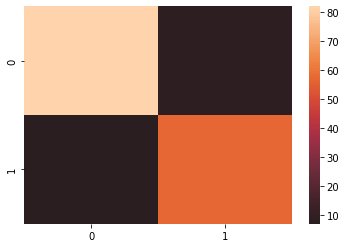

In [25]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()